In [6]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5


# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Configuración warnings
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [21]:
df_s_H = pd.read_csv("./data.csv")
df_s_H.rename( columns={'Unnamed: 0':'fecha'}, inplace=True )
df_s_H = df_s_H.set_index("fecha")

Fechas train : 2021-09-21 --- 2021-11-23  (n=64)
Fechas test  : 2021-11-24 --- 2021-12-31  (n=36)


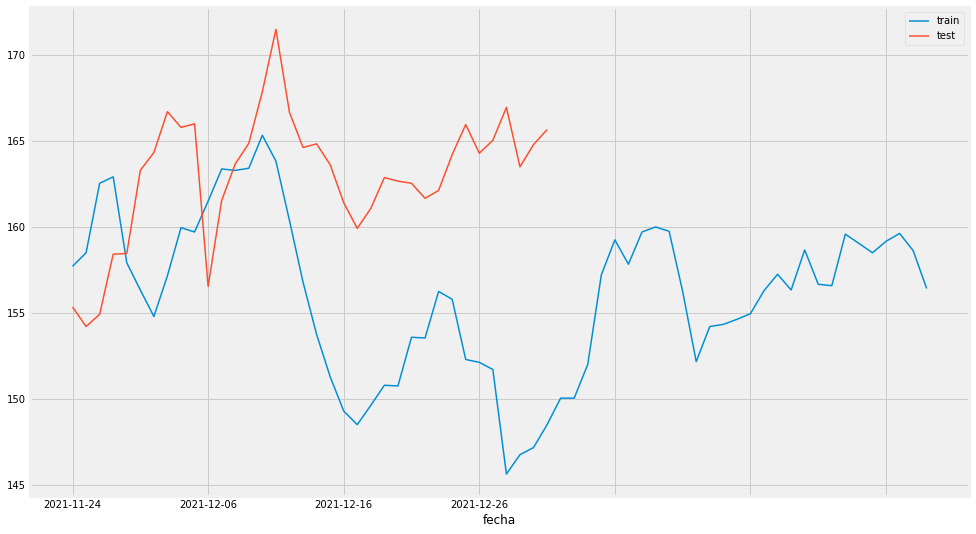

In [27]:

# df_s_H = df_s_H.sort_index()
datos = df_s_H[-100:]
steps = 36
datos_train = datos[:-steps]
datos_test  = datos[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(15, 9))
datos_train['NM[cm]'].plot(ax=ax, label='train')
datos_test['NM[cm]'].plot(ax=ax, label='test')
ax.legend();

In [12]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=datos_train['NM[cm]'])
forecaster

c:\Users\Fabian\AppData\Local\Programs\Python\Python39\lib\site-packages\skforecast\utils\utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
c:\Users\Fabian\AppData\Local\Programs\Python\Python39\lib\site-packages\skforecast\utils\utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 21613] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-06-27 18:10:20 
Last fit date: 2022-06-27 18:10:32 
Skforecast version: 0.4.3 

In [17]:
steps = 1000
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

21614    159.984694
21615    160.282250
21616    160.070214
21617    159.568569
21618    160.210379
Name: pred, dtype: float64

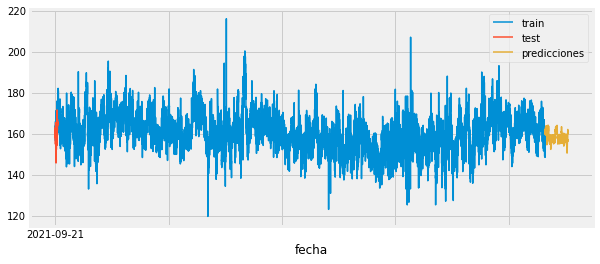

In [18]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['NM[cm]'].plot(ax=ax, label='train')
datos_test['NM[cm]'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend()